<a href="https://colab.research.google.com/github/AdaobiNwafor/DataScience-Projects/blob/main/Predicting_Insurance_Data_Visualisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn import metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

In [ ]:
insurance = pd.read_csv('insurance.csv')
df = pd.DataFrame(insurance)
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


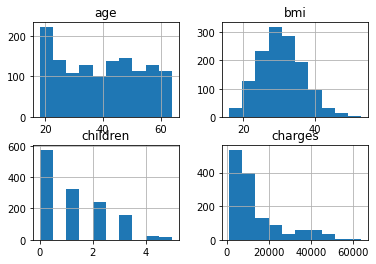

In [ ]:
df.hist()
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa0217c5b50>]],
      dtype=object)

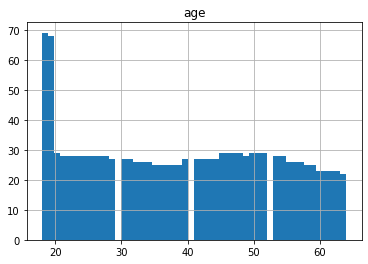

In [ ]:
df.hist('age', bins=50)

In [ ]:
corr = df.corr()
corr['age']

age         1.000000
bmi         0.109272
children    0.042469
charges     0.299008
Name: age, dtype: float64

In [ ]:
corr['charges']

age         0.299008
bmi         0.198341
children    0.067998
charges     1.000000
Name: charges, dtype: float64

In [ ]:
df.shape

(1338, 7)

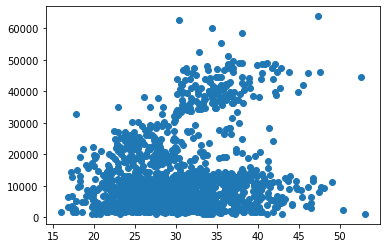

In [ ]:
plt.scatter(x=df['bmi'],y=df['charges'])
plt.show()

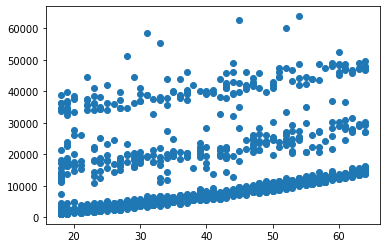

In [ ]:
plt.scatter(x=df.age, y=df.charges)

In [ ]:
X = df[['age']]
y = df['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
lr = LinearRegression().fit(X_train, y_train)
ypred = lr.predict(X_test)

mse = mean_squared_error(ypred, y_test)
rmse = np.sqrt(mse)

print(f'MSE: {mse:.2f}')
print(f'RMSE: {rmse:.2f}')
print(f'Linear Regression score: {lr.score(X_test, y_test)}')

MSE: 139176465.01
RMSE: 11797.31
Linear Regression score: 0.12539120236863355


In [ ]:
# log_reg = LogisticRegression().fit(X_train, y_train)
# ypred = log_reg.predict(X_test)

# mse = mean_squared_error(ypred, y_test)
# rmse = np.sqrt(mse)
# print(f'MSE: {mse:.2f}')
# print(rmse)

In [ ]:
from sklearn.metrics import r2_score

r2_score(ypred, y_test)

-11.70155939497204

In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [ ]:
df = pd.get_dummies(df, columns=['sex', 'smoker', 'region'], prefix=['sex', 'smoker', 'region'])
df.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [ ]:
corr = df.corr()
corr['region_southwest']['charges']

-0.043210028991684156

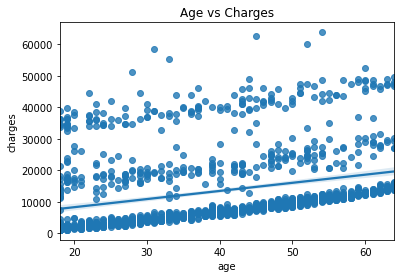

In [ ]:
sns.regplot(x=df.age, y=df.charges)
plt.title('Age vs Charges')
plt.show()

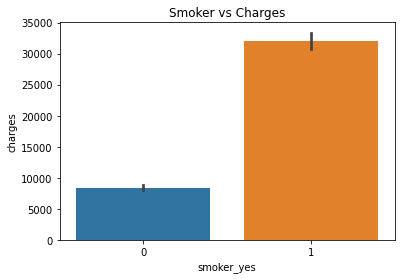

In [ ]:
sns.barplot(x=df['smoker_yes'], y=df.charges)
plt.title('Smoker vs Charges')
plt.show()

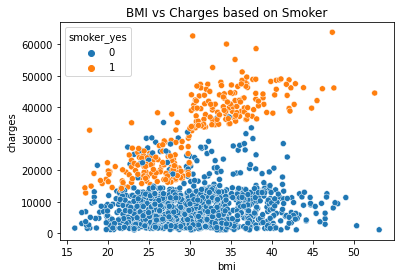

In [ ]:
sns.scatterplot(x=df['bmi'], y=df['charges'], hue=df['smoker_yes'])
plt.title('BMI vs Charges based on Smoker')
plt.show()

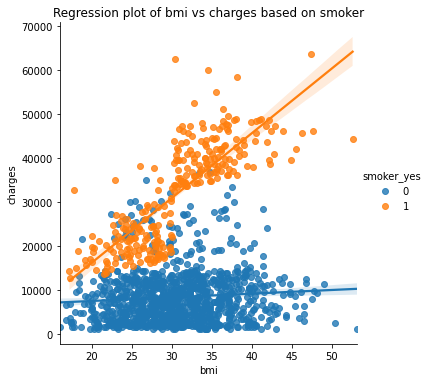

In [ ]:
sns.lmplot(x='bmi', y='charges', hue='smoker_yes', data=df)
plt.title('Regression plot of bmi vs charges based on smoker')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 67.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


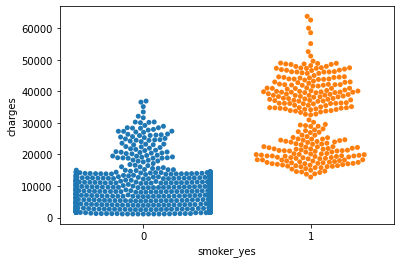

In [ ]:
sns.swarmplot(x=df['smoker_yes'], y=df['charges'])

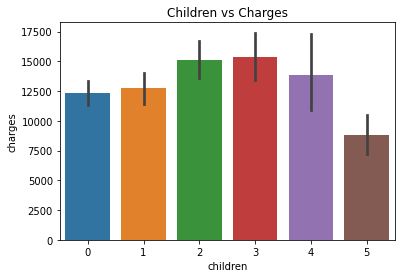

In [ ]:
sns.barplot(x=df['children'], y=df['charges'])
plt.title('Children vs Charges')
plt.show()

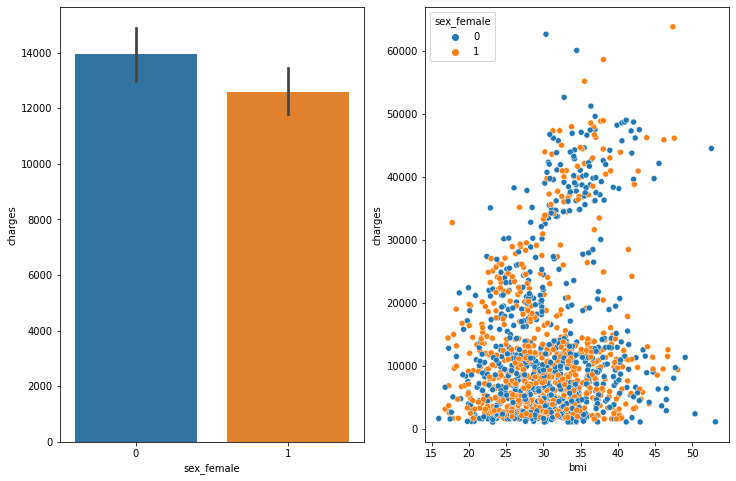

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12,8))
sns.barplot(ax=axes[0], x=df['sex_female'], y=df['charges'])
sns.scatterplot(ax=axes[1], x=df['bmi'], y=df['charges'], hue=df['sex_female'])

In [ ]:
df['charges'].describe()

count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64

In [ ]:
import pandas as pd

insurance2 = pd.read_csv('insurance.csv')
df1 = pd.DataFrame(insurance2)

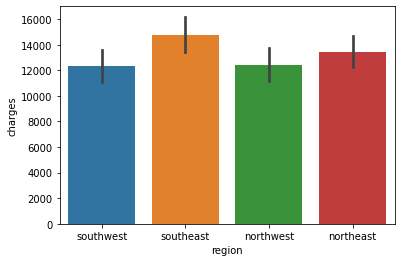

In [ ]:
sns.barplot(x=df1['region'], y=df['charges'])

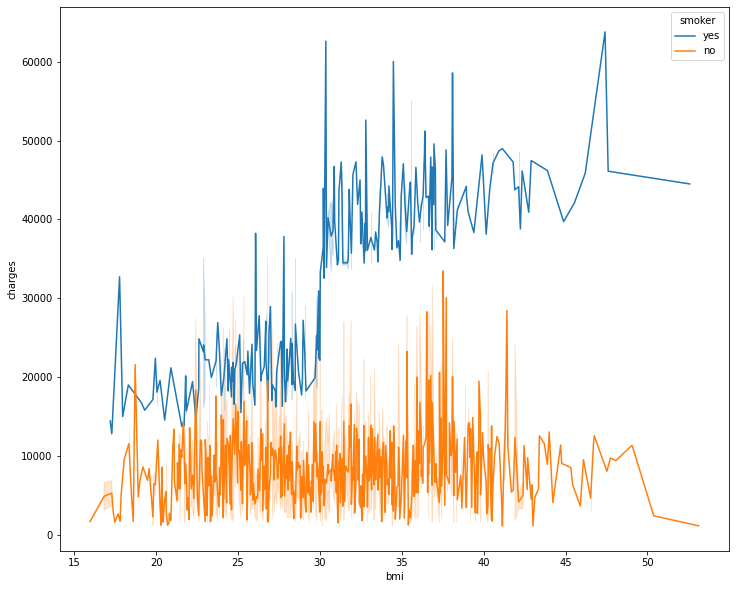

In [ ]:
plt.figure(figsize=(12,10))
sns.lineplot(x=df1['bmi'], y=df1['charges'], hue=df1['smoker'])
plt.show()

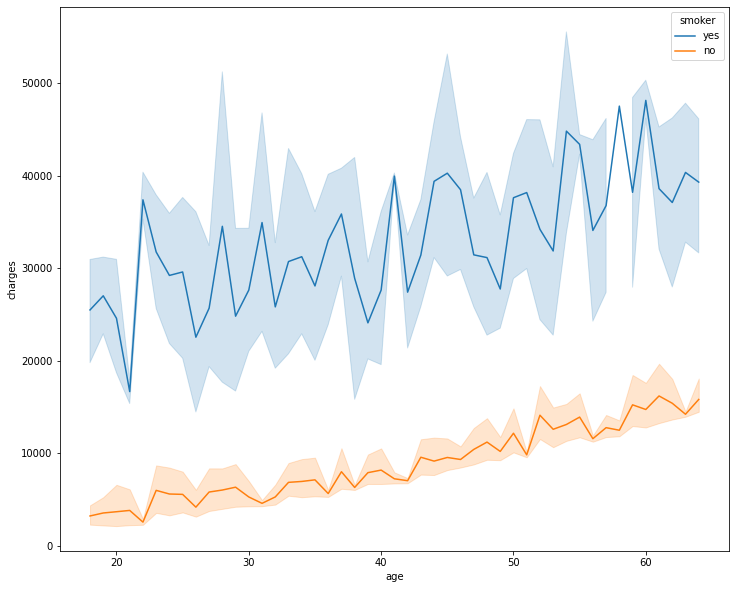

In [ ]:
plt.figure(figsize=(12,10))
sns.lineplot(data=df1, x='age', y='charges', hue='smoker')

In [ ]:
df.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [ ]:
X = df[['age', 'bmi', 'sex_male', 'smoker_yes', 'region_northeast']]
y = df['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
model = LinearRegression().fit(X_train, y_train)
ypred = model.predict(X_test)

mse = mean_squared_error(ypred, y_test)
rmse = np.sqrt(mse)

print(f'{mse:.2f}')
print(f'{rmse:.2f}')
print(r2_score(ypred, y_test))
print(f'Linear Regression score: {model.score(X_test, y_test)}')

32478370.95
5698.98
0.722874992982407
Linear Regression score: 0.7959003416329887


In [ ]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=2).fit(X_train, y_train)
ypred = knn.predict(X_test)

mse = mean_squared_error(ypred, y_test)
rmse = np.sqrt(mse)
print(f'MSE: {mse:.2f}\nRMSE:{rmse:.2f}')
print(f'KNN score: {knn.score(X_test, y_test)}')
print(f'R2 Score: {r2_score(ypred, y_test)}')

MSE: 31054674.28
RMSE:5572.67
KNN score: 0.8048470958526197
R2 Score: 0.8038732616706028


In [ ]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(max_leaf_nodes=11).fit(X_train, y_train)
ypred = model.predict(X_test)

mse = mean_squared_error(ypred, y_test)
rmse = np.sqrt(mse)
print(f'MSE: {mse:.2f}\nRMSE:{rmse:.2f}')
print(f'Decision score: {model.score(X_test, y_test)}')
print(f'R2 Score: {r2_score(ypred, y_test)}')

MSE: 19900538.49
RMSE:4461.00
Decision score: 0.8749415999336478
R2 Score: 0.8683414137672627


Scaling the data to see if there is a different

In [ ]:
df.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [ ]:
X = df[['age', 'bmi', 'children', 'sex_female', 'smoker_yes']]
y = df['charges']

from sklearn.preprocessing import StandardScaler

X2 = StandardScaler().fit_transform(X)

In [ ]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X2, y, test_size=0.2, random_state=0)

In [ ]:
model = LinearRegression().fit(X_train1, y_train1)
ypred = model.predict(X_test1)

mse = mean_squared_error(ypred, y_test1)
rmse = np.sqrt(mse)

print(f'MSE: {mse:.2f}')
print(f'RMSE: {rmse:.2f}\n')
print(f'Linear regression score: {model.score(X_test1, y_test1)}\n')
print(f'R2 Score: {r2_score(ypred, y_test1)}')

MSE: 32165826.64
RMSE: 5671.49

Linear regression score: 0.7978644236809905

R2 Score: 0.7238911072887936


In [ ]:
knn = KNeighborsRegressor(n_neighbors=2).fit(X_train1, y_train1)
ypred2 = knn.predict(X_test1)

mse = mean_squared_error(ypred2, y_test1)
rmse = np.sqrt(mse)

print(f'MSE: {mse:.2f}')
print(f'RMSE: {rmse:.2f}\n')
print(f'KNN regression score: {model.score(X_test1, y_test1)}\n')
print(f'R2 Score: {r2_score(ypred2, y_test1)}')

MSE: 31054674.28
RMSE: 5572.67

KNN regression score: 0.7978644236809905

R2 Score: 0.8038732616706028


In [ ]:
tree = DecisionTreeRegressor(max_leaf_nodes=11).fit(X_train1, y_train1)
ypred3 = tree.predict(X_test1)

mse = mean_squared_error(ypred3, y_test1)
rmse = np.sqrt(mse)

print(f'MSE: {mse:.2f}')
print(f'RMSE: {rmse:.2f}\n')
print(f'Decision Tree regression score: {model.score(X_test1, y_test1)}\n')
print(f'R2 Score: {r2_score(ypred3, y_test1)}')

MSE: 19900538.49
RMSE: 4461.00

Decision Tree regression score: 0.8749415999336478

R2 Score: 0.8683414137672627
